In [1]:
import numpy as np
import pandas as pd # data frame
import matplotlib.pyplot as plt # visualization
import seaborn as sns # visualization

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno # null data를 보여줌

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head(10) # default = 5

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
for col in df_train.columns:
    msg = f'column : {col:>10}\t Percent of NaN value: {100*(df_train[col].isnull().sum()/df_train[col].shape[0]):.2f}%'
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :   Survived	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 19.87%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.00%
column :      Cabin	 Percent of NaN value: 77.10%
column :   Embarked	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = f'column : {col:>10}\t Percent of NaN value: {100*(df_test[col].isnull().sum()/df_test[col].shape[0]):.2f}%'
    print(msg)

column : PassengerId	 Percent of NaN value: 0.00%
column :     Pclass	 Percent of NaN value: 0.00%
column :       Name	 Percent of NaN value: 0.00%
column :        Sex	 Percent of NaN value: 0.00%
column :        Age	 Percent of NaN value: 20.57%
column :      SibSp	 Percent of NaN value: 0.00%
column :      Parch	 Percent of NaN value: 0.00%
column :     Ticket	 Percent of NaN value: 0.00%
column :       Fare	 Percent of NaN value: 0.24%
column :      Cabin	 Percent of NaN value: 78.23%
column :   Embarked	 Percent of NaN value: 0.00%


In [10]:
df_train[col]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [11]:
df_train[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [12]:
df_train[col].isnull().sum()

2

In [13]:
df_train[col].shape

(891,)

In [14]:
df_train[col].isnull().sum() / df_train[col].shape[0]

0.002244668911335578

<AxesSubplot:>

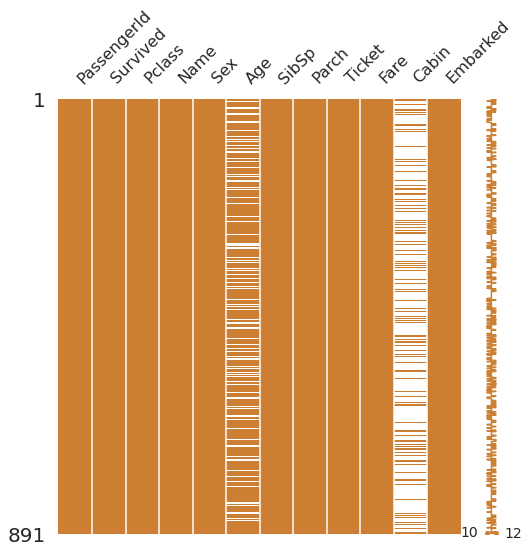

In [15]:
msno.matrix(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 분포를 확인 할 수 있다.

In [16]:
df_train.iloc[:, 1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

<AxesSubplot:>

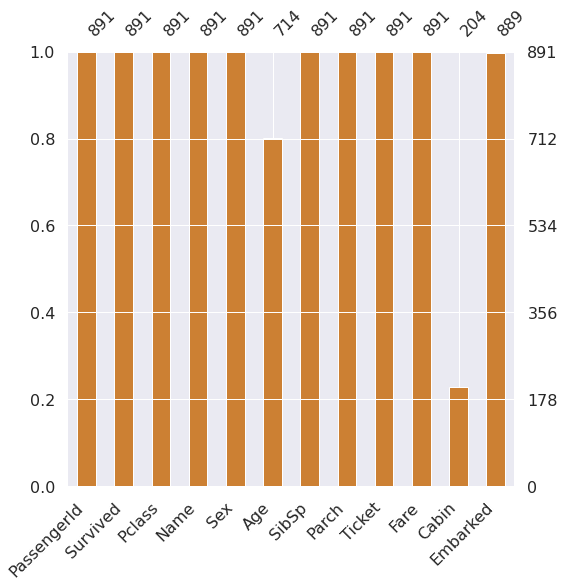

In [17]:
msno.bar(df=df_train.iloc[:, :], figsize=(8, 8), color=(0.8, 0.5, 0.2)) # 개수를 대략적으로 확인할 수 있음

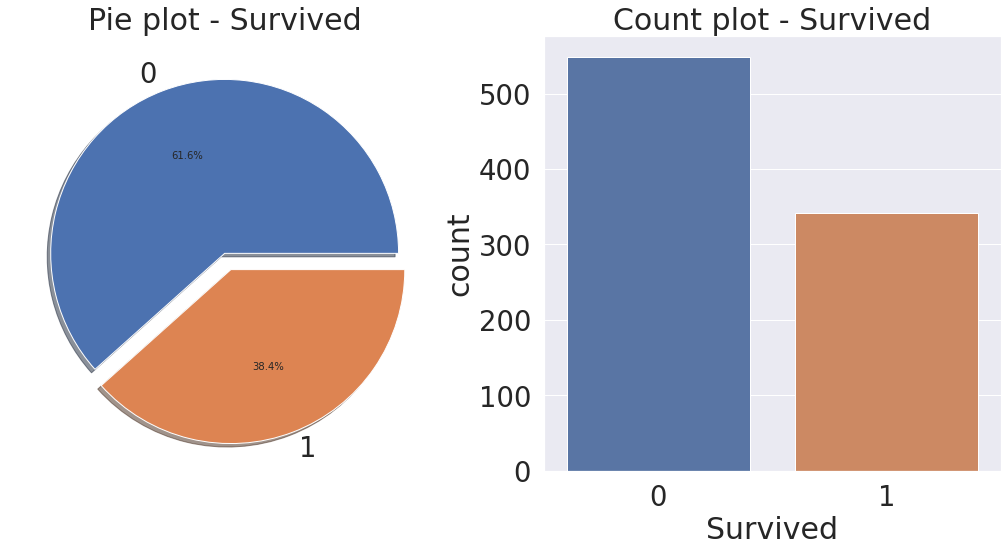

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived']. value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')
plt.show()

In [19]:
df_train['Survived']. value_counts()

0    549
1    342
Name: Survived, dtype: int64

## 2.1 Pclass

In [20]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


### Pclass가 1일 때, 136명의 생존자/ 2일 때 87명/ 3일 때119명

In [24]:
df_train[['Pclass', 'Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [25]:
df_train['Survived'].unique()

array([0, 1])

In [36]:
# margins : all column을 추가.
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

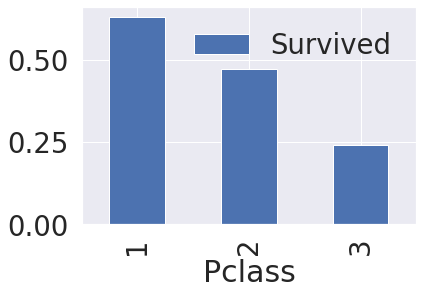

In [49]:
# as_index : Pclass를 index로 한다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

<AxesSubplot:>

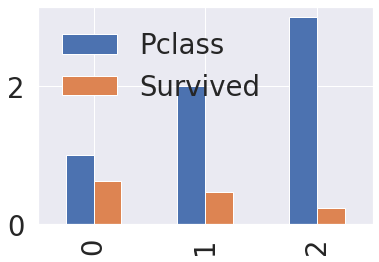

In [50]:
# as_index가 False이면 두개가 모두 출력 된다.
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).plot.bar()

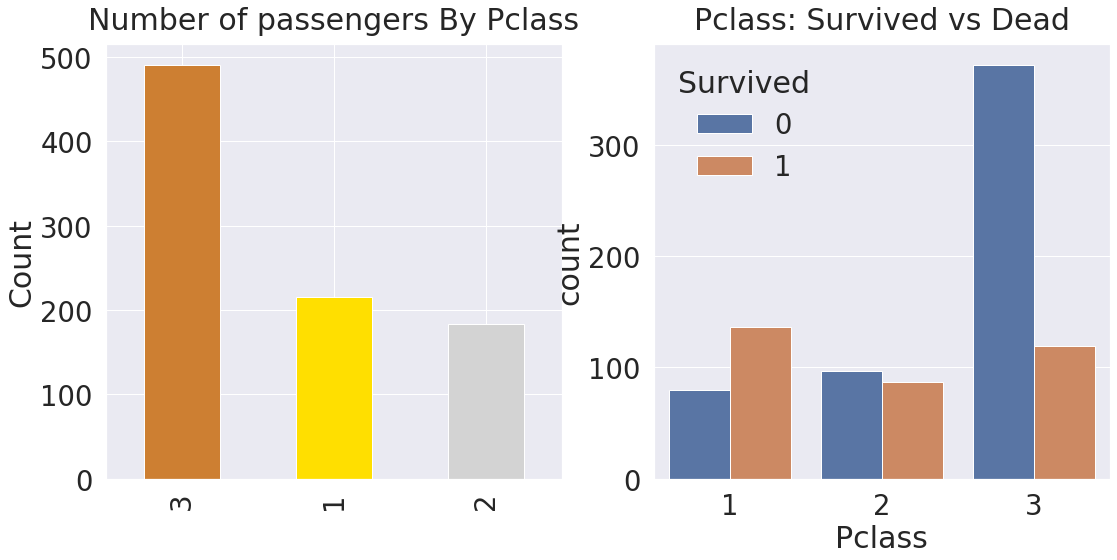

In [52]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

## 2.2 sex

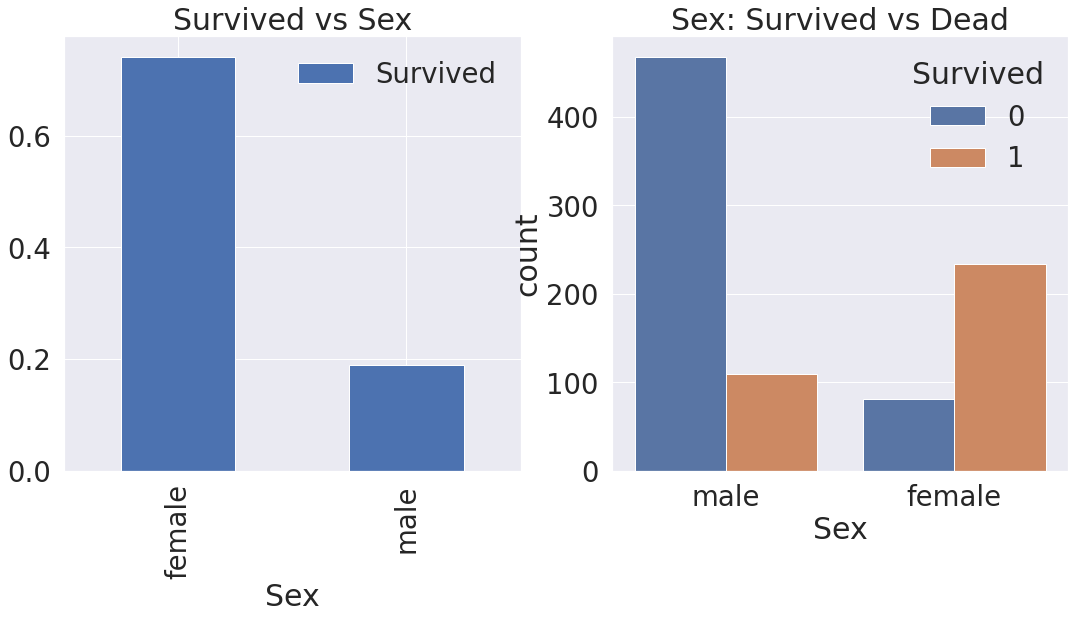

In [53]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

<AxesSubplot:xlabel='Sex'>

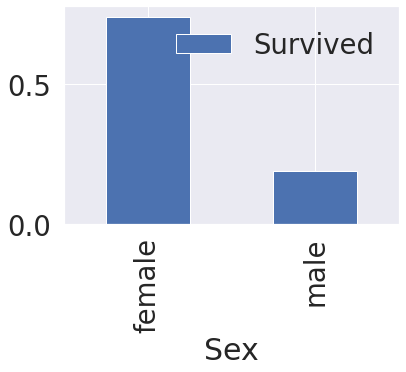

In [54]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar()

In [55]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [57]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


## 2.2 Both Sex and Pclass

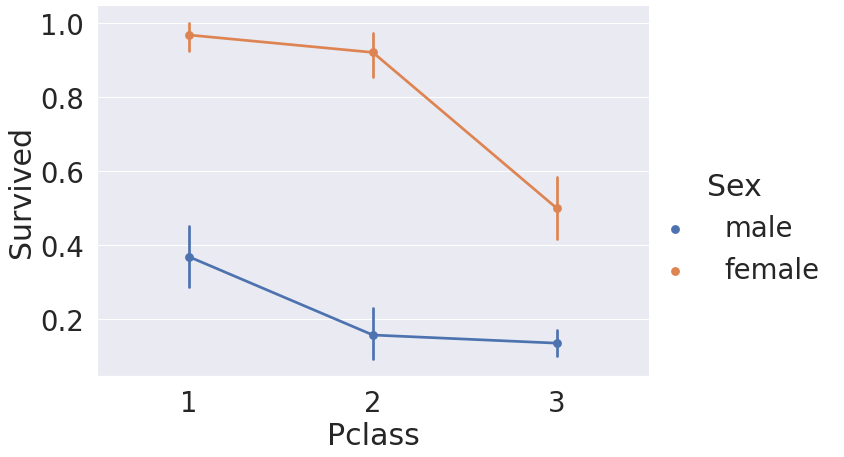

In [58]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)

- Lady first,
- Money brings survival?

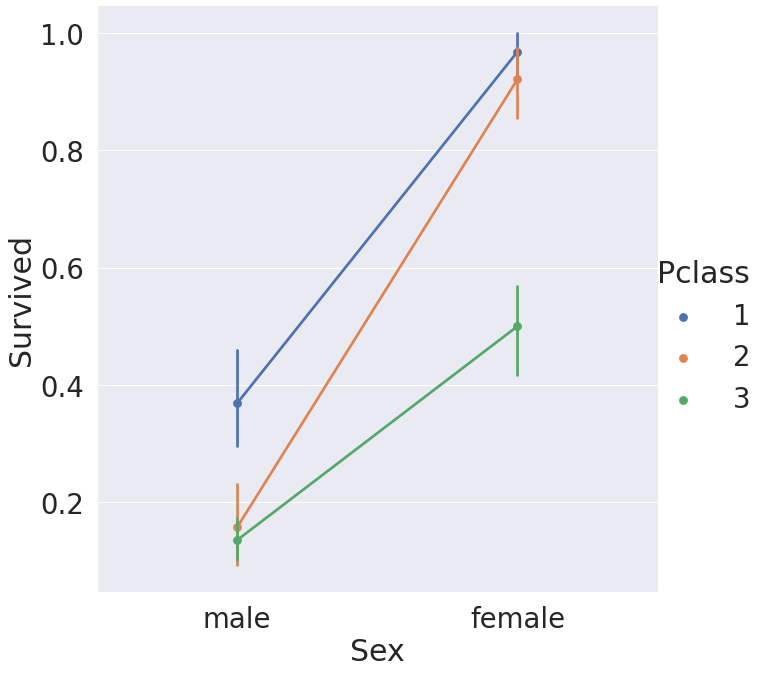

In [61]:
sns.factorplot(x='Sex', y='Survived', hue='Pclass', data=df_train, saturation=5, size=9, aspect=1)

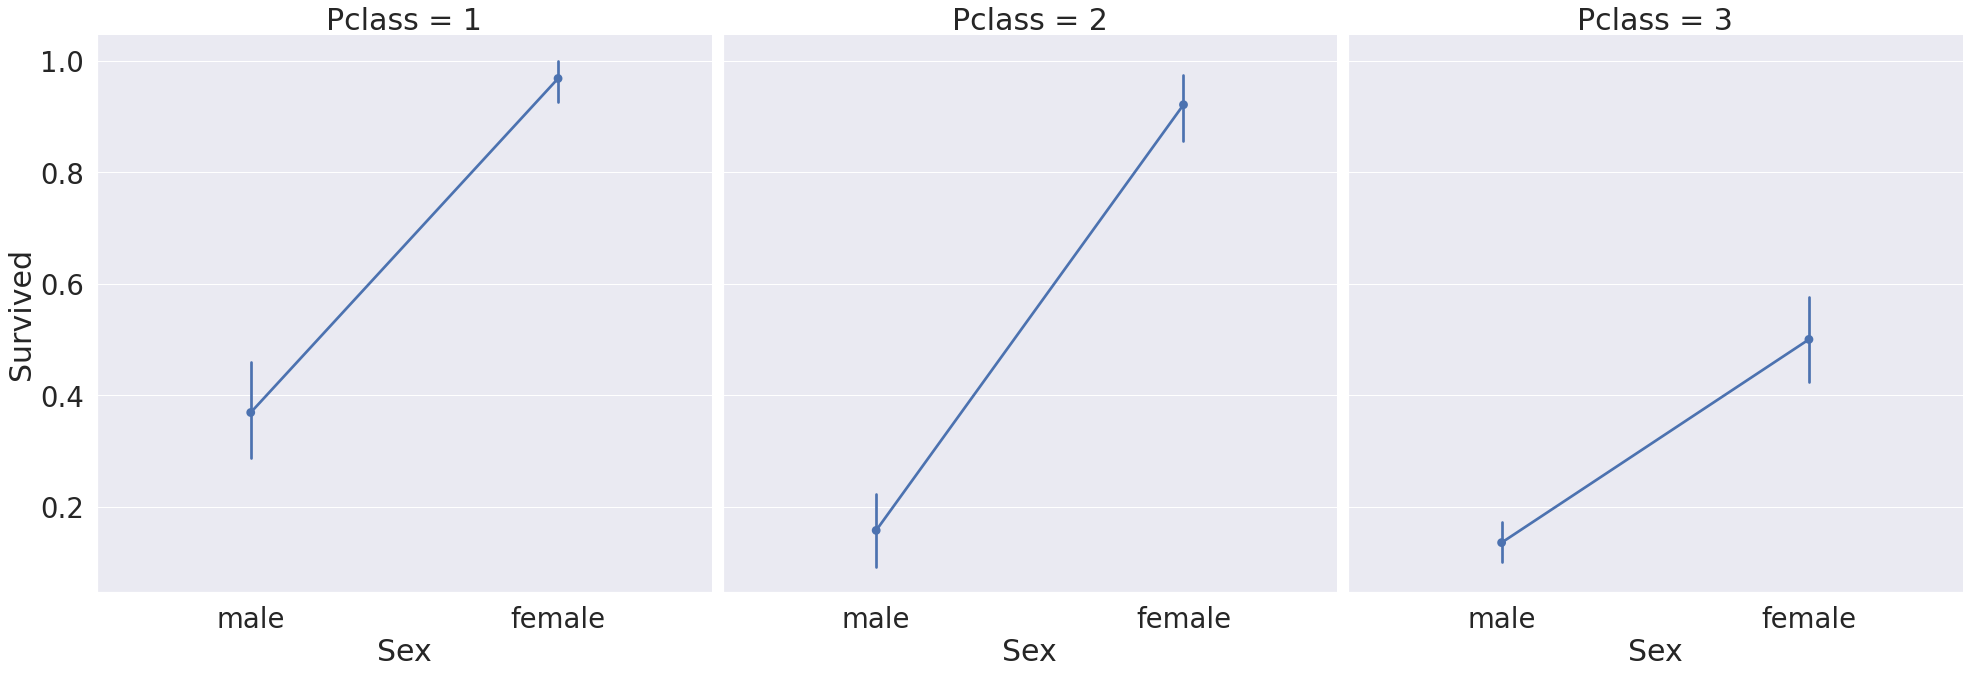

In [62]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, saturation=5, size=9, aspect=1)

## Age

In [63]:
print(f"제일 나이 많은 탑승객: {df_train['Age'].max():.1f} years.")
print(f"제일 어린 탑승객: {df_train['Age'].min():.1f} years.")
print(f"탑승객 평균 나이: {df_train['Age'].mean():.1f} years.")

제일 나이 많은 탑승객: 80.0 years.
제일 어린 탑승객: 0.4 years.
탑승객 평균 나이: 29.7 years.


### kdeplot : 데이터 분포를 그려주는 함수

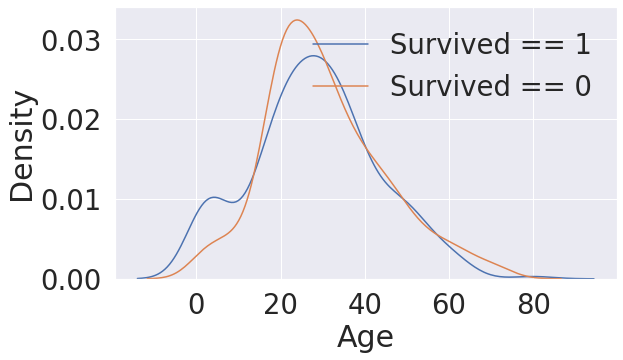

In [65]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()

### hist로 보면 아래와 같고 위의 파란선과 분포가 비슷하다.

<AxesSubplot:>

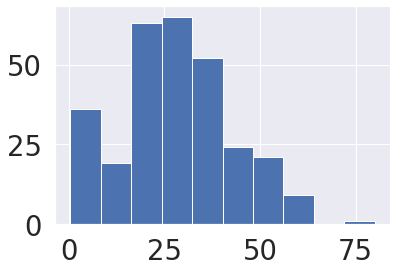

In [66]:
df_train[df_train['Survived'] == 1]['Age'].hist()

### 다양한 indexing

In [67]:
df_train.iloc[0, :]

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

In [71]:
for row in df_train.iterrows():
    break
row

(0,
 PassengerId                          1
 Survived                             0
 Pclass                               3
 Name           Braund, Mr. Owen Harris
 Sex                               male
 Age                                 22
 SibSp                                1
 Parch                                0
 Ticket                       A/5 21171
 Fare                              7.25
 Cabin                              NaN
 Embarked                             S
 Name: 0, dtype: object)

In [77]:
df_train[df_train['Survived'] == 1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

## 다양하게 그래프 그리는 법

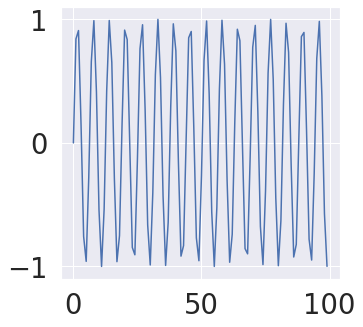

In [81]:
f = plt.figure(figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

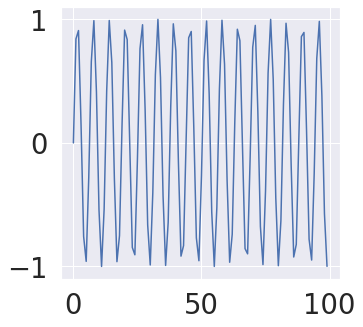

In [82]:
f, ax = plt.subplots(1, 1, figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
ax.plot(b)

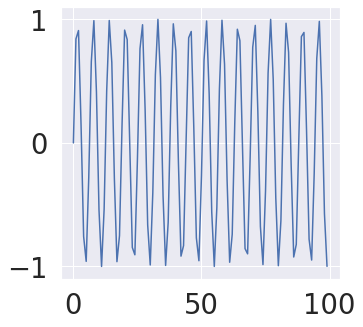

In [83]:
plt.figure(figsize=(5, 5))
a = np.arange(100)
b = np.sin(a)
plt.plot(b)

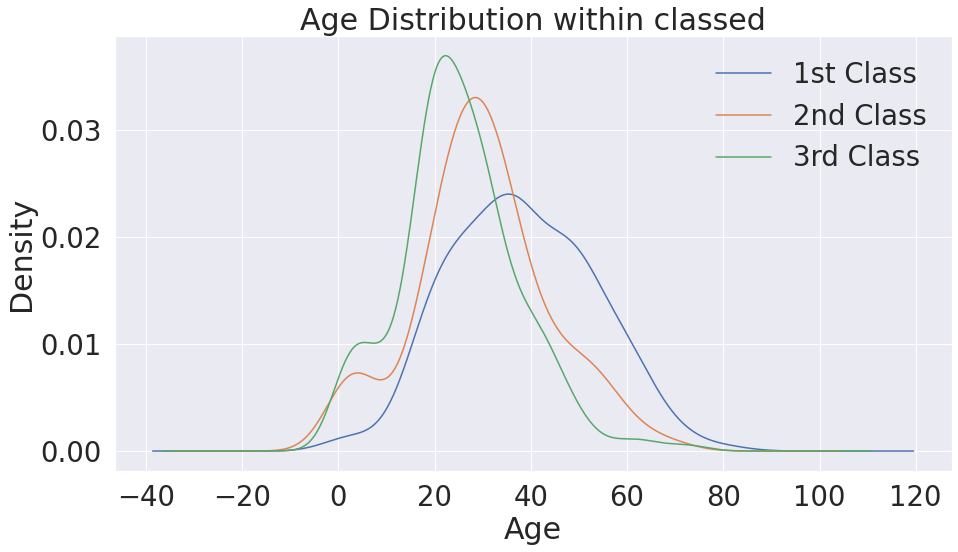

In [89]:
plt.figure(figsize=(15, 8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classed')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### hist로 하면 안보인다..

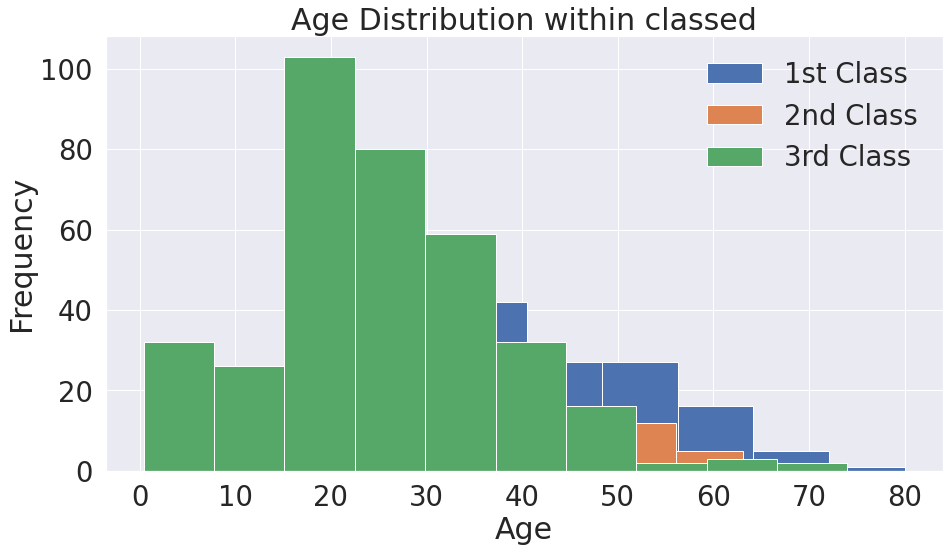

In [90]:
plt.figure(figsize=(15, 8))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='hist')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='hist')

plt.xlabel('Age')
plt.title('Age Distribution within classed')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

### 생존확률을 보려면 아래와 같이 작성

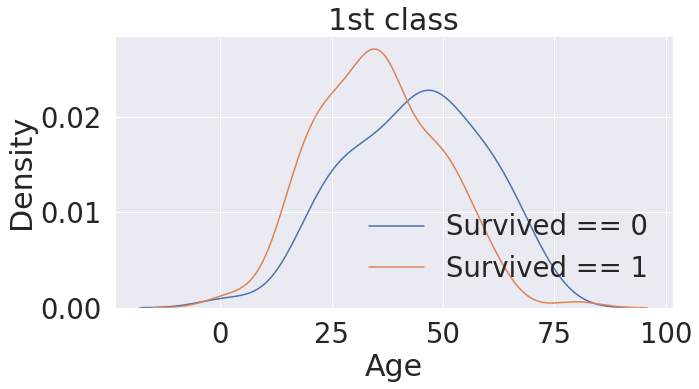

In [95]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 1)]['Age'], ax=ax)
plt.title('1st class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


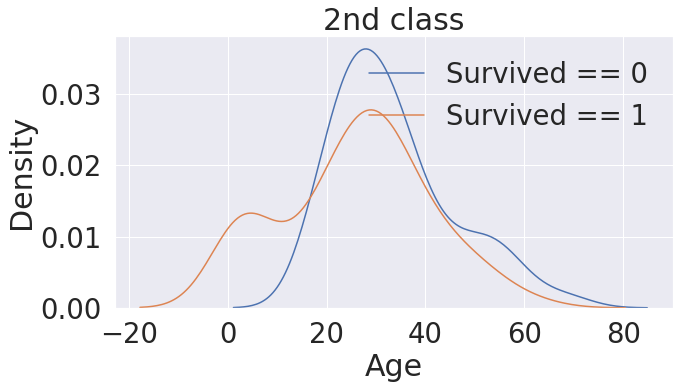

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 2)]['Age'], ax=ax)
plt.title('2nd class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


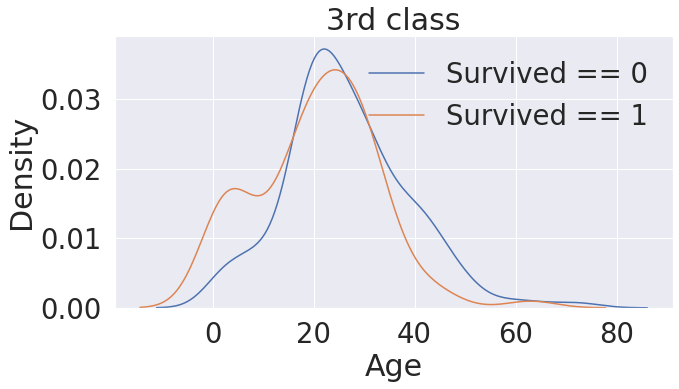

In [97]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.kdeplot(df_train[(df_train['Survived'] == 0) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived'] == 1) & (df_train['Pclass'] == 3)]['Age'], ax=ax)
plt.title('3rd class')
plt.legend(['Survived == 0', 'Survived == 1'])
plt.show()


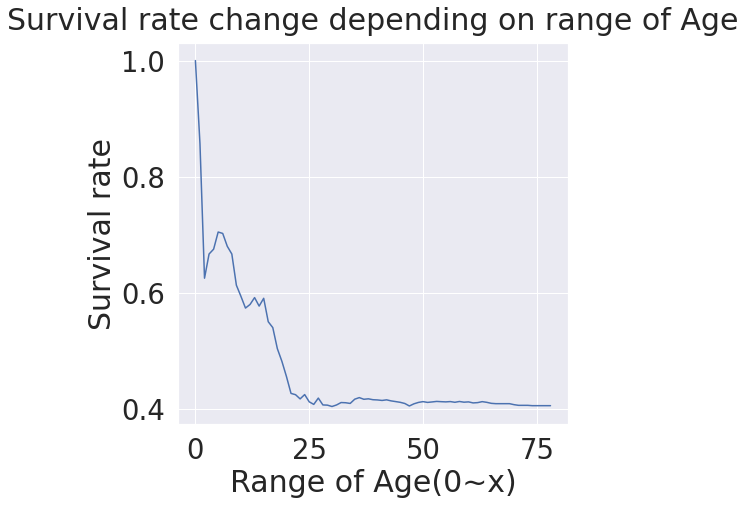

In [103]:
# 1~80세까지의 생존률

change_age_range_survival_ratio = []
for i in range(1, 80):
    change_age_range_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize=(7, 7))
plt.plot(change_age_range_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

In [100]:
# i = 10일 때, 아래 코드는 10살보다 적은 아이들의 생존률이다.

i = 10
df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived'])

0.6129032258064516

In [102]:
len(df_train[df_train['Age'] < i]['Survived'])

62